## Performance Curve

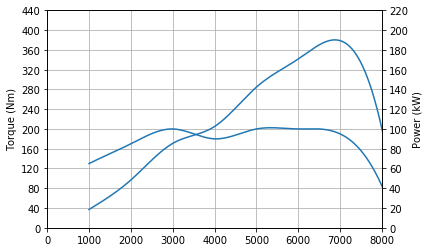

In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline

rpm_points = np.array([1000,1500,2000,3000,4000,5000,6000,6500,7000,7200]) # rpm
torque_points = np.array([130,150,170,200,180,200,200,200,190,180]) # Nm
power_points = torque_points*(rpm_points*2*np.pi/60) # W
power_ps_points = torque_points*(rpm_points*2*np.pi/60)/1000*1.35962 # PS
res = 1000
N = 12

rpm2t = interpolate.splrep(rpm_points,torque_points)
rpm2pow = interpolate.splrep(rpm_points,power_points)
rpm2ps = interpolate.splrep(rpm_points,power_ps_points)
rpm = np.linspace(1000,1000*torque_points.size,res) # rpm
torque = interpolate.splev(rpm,rpm2t) #

#power = torque*(rpm*2*np.pi/60)/1000 # kW
#power_ps = power*1.35962
power_ps = interpolate.splev(rpm,rpm2ps)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(rpm,torque)
ax.set_ylabel("Torque (Nm)")
ax.set_xlim(0,8000)
ax.set_ylim(0,320)
ax.set_yticks([i*40 for i in range(N)])
ax.grid()

ax2 = ax.twinx()
ax2.plot(rpm,power_ps)
ax2.set_ylabel("Power (kW)")
ax2.set_ylim(0,160)
ax2.set_yticks([i*20 for i in range(N)])

plt.show()

In [2]:
m = 1480 # kg

n_gears = 6
rev_limit = 7000 # rpm
rev_drop_rate = 3000 # rpm
shift_time = 0.5 # seconds
wheel_radius = 0.3 # m
gears = np.array([0,3.538,2.060,1.404,1.000,0.713,0.582])*4.100
cd = 0.3
S = 0.55 # m^2
rho = 1.225 # kg/m^3 @ 15C, 1013hPa

dt =  0.1 # seconds

t0,g0,th0,rpm0,a0,v0,p0 = 0,1,0,1000,0,0.1,0
history = [[t0,g0,th0,rpm0,a0,v0,p0]] # t,gear,throttle,rpm,acceleration,velocity,position

t_shift = None
for i in range(100):
    t,g,th,rpm,a,v,p = tuple(history[-1])
    
    rpm = min(rpm,rev_limit)
    
    t += dt
    if t_shift==None:
        th = 1.0 # flat out
    else:
        th = 0.0
    power = interpolate.splev([rpm],rpm2pow)[0] # W
    
    # acceleration
    torque_engine = interpolate.splev([rpm],rpm2t)[0] # W
    torque_wheel = torque_engine * gears[g]
    thrust = torque_wheel/wheel_radius #N
    drag = cd*S*(0.5*rho*v*v)
    a = (thrust-drag)/m
    omega_dot_wheel = a/wheel_radius
    omega_dot_engine = omega_dot_wheel*gears[g]
    #print(torque_wheel,force,a,omega_dot)
    
    # integrate
    p += v*dt
    v += a*dt
    rpm += (omega_dot_engine*dt)*60/(2*np.pi)
    
    # shift
    if rpm>rev_limit and t_shift==None:
        t_shift = 0.0
        g+=1
    if t_shift!=None:
        print(t_shift,rpm)
        t_shift+=dt
        rpm-=rev_drop_rate*dt
        if t_shift>shift_time and g<len(gears)-1:
            t_shift=None

    
    history.append([t,g,th,rpm,a,v,p])



0.0 7051.28916581333
0.1 6851.794654297446
0.2 6653.579845268338
0.30000000000000004 6455.667812252087
0.4 6257.613759976929
0.5 6059.533911205299
0.0 7072.603396112418
0.1 6818.839045244137
0.2 6565.814996379202
0.30000000000000004 6312.862025799874
0.4 6059.8322912869035
0.5 5806.99568112009
0.0 7040.742265746251
0.1 6763.742985384941
0.2 6487.071706270203
0.30000000000000004 6210.388974488378
0.4 5933.704722739474
0.5 5657.171507732673


Text(0.5, 1.0, 'gear')

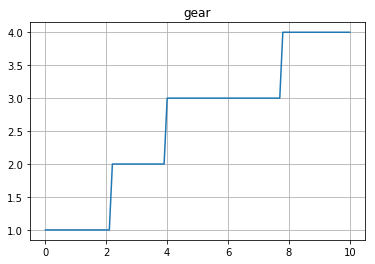

In [3]:
history = np.array(history)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(history[:,0],history[:,1])
ax.grid()
ax.set_title("gear")

Text(0.5, 1.0, 'rpm')

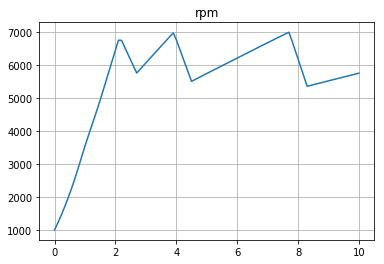

In [4]:
history = np.array(history)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(history[:,0],history[:,3])
ax.grid()
ax.set_title("rpm")

Text(0.5, 1.0, 'acc')

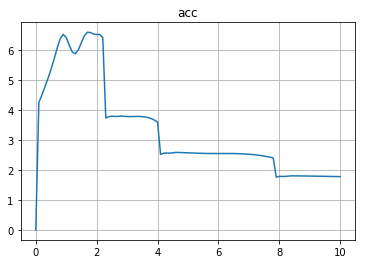

In [5]:
history = np.array(history)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(history[:,0],history[:,4])
ax.grid()
ax.set_title("acc")

Text(0.5, 1.0, 'vel')

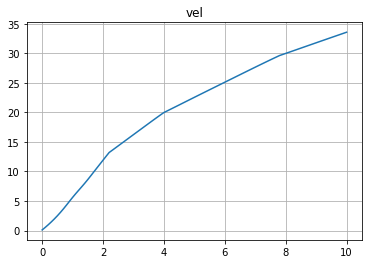

In [6]:
history = np.array(history)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(history[:,0],history[:,5])
ax.grid()
ax.set_title("vel")